# Project: Wrangle and Analyze Twitter Data

-by imen bakir

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Data Description

The dataset that we will be working on is the tweet archive of Twitter user `@dog_rates`, also known as **WeRateDogs**. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets until August 1, 2017.


<a id='gathering'></a>
## Data Gathering

In this section we will be gathering data from three different sources and in a variety of formats.

1- The [WeRateDogs Twitter archive](#https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv) provided by [Udacity](#https://www.udacity.com/)

2- The tweet image predictions dataset downloaded from [Udacity](#https://www.udacity.com/)'s server using [this link](#https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)

3- Twitter API using python's [Tweepy](#http://www.tweepy.org/) package to get **retweet count** and **favorite count**

In [494]:
#installing important packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline 
#to make visualisations be plotted inline within the notebook

### The WeRateDogs Twitter archive dataset

In [495]:
twitter_archive = pd.read_csv("../input/twitterarchiveenhanced/twitter-archive-enhanced.csv")
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [496]:
twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [497]:
twitter_archive.shape

(2356, 17)

### The tweet image predictions dataset

In [498]:
#import the requests library
import requests

#use 'request' library to download 'image_predictions.tsv' file from the provided URL
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url) #to download the data behind that URL


#open the response into a new file called image_predictions.tsv
open("image_predictions.tsv", "wb").write(response.content)

335079

This file (image_predictions.tsv) is present in each tweet according to a neural network.
##### Instead i'm going to use the dataset that I've already downloaded

In [499]:
image_tsv = pd.read_csv('../input/image-predictions-dataset/image_predictions.tsv', sep='\t')
image_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Additional data from the Twitter API
Access each tweet's JSON data from the Twitter API using `Tweepy` (Python library) and the **tweet IDs** in the WeRateDogs Twitter archive.

To access twitter API, we need an **access_key** and **access_token**, so I created a Twitter account and set up a [developer account](#https://developer.twitter.com/en/docs/basics/developer-portal/overview) for access and got my API Keys.

Then I used Tweepy package to send request and receive data from Twitter.

In [500]:
!pip install tweepy

In [501]:
import tweepy
from tweepy import OAuthHandler
import json


# # Initializing the necessary variables
consumer_key = "Hidden"
consumer_secret = "Hidden"
access_token = "Hidden"
access_secret = "Hidden"
# # Tokens are removed for security purpose

# # Initiating the tweepy object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# # Making the API ready to query
api = tweepy.API(auth, wait_on_rate_limit=True)

In [502]:
#get tweet IDs to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
print('list of twitter ids: ', tweet_ids , '\nsize of list : ', len(tweet_ids))

list of twitter ids:  [892420643555336193 892177421306343426 891815181378084864 ...
 666033412701032449 666029285002620928 666020888022790149] 
size of list :  2356


##### scraping Twitter's API in a json file with tweepy :

<a href="#bottom">click to go bottom</a>

In [503]:
#Creating dictionary where errors occured while scraping with some tweet_id will be stored and the causes of the error
count = 0
fails_dict = {}
start = time.time()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
#end time
end = time.time()
#calculating the estimated time in minutes.
print(f'it uses {end - start} seconds which is {(end - start) / 60} minutes.')

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

<a id='bottom'></a>
**It took approximately 31 minutes for the scraping to be executed**

<a href="#intro">click to go top</a>

we have to read the json file line by line into a pandas dataframe with the **tweet ID**, **retweet count**, and **favorite count**.

In [504]:
date = []
tweet_id = []
favorite_count = []
retweet_count = []
#Reading tweet_json.txt to Dataframe
with open('./tweet_json.txt','r') as tweets:
    for tweet in tweets:
        tweet_js = json.loads(tweet)
        date.append(tweet_js['created_at'])
        tweet_id.append(tweet_js['id'])
        favorite_count.append(tweet_js['favorite_count'])
        retweet_count.append(tweet_js['retweet_count'])
#merging all columns to a dataframe.
df_json = pd.DataFrame({'Date': date,'Tweet_id': tweet_id,'favorite_count': favorite_count,'retweet_count': retweet_count})

In [505]:
df_json.head(5)

,Date,Tweet_id,favorite_count,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,33225,6934
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,28747,5238
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,21612,3450
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,36248,7154
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,34673,7678


<a id='wrangling'></a>
## Data wrangling
### Assessing data:

Assess the 3 datasets to improve their quality and avoid costly mistakes.

##### Assessing twitter archive enhanced data:

In [506]:
#first dataset: twitter archive
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [507]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [508]:
twitter_archive[twitter_archive.in_reply_to_status_id.notnull()].head(3)
#the non null values of the column 'in_reply_to_status_id'

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None


In [509]:
twitter_archive[twitter_archive.retweeted_status_id.notnull()].head(3)
#the non null values of the column 'retweeted_status_id'

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None


In [510]:
twitter_archive.shape 

(2356, 17)

In [511]:
twitter_archive.duplicated().sum() #checking for duplicated values

0

In [512]:
twitter_archive.isnull().sum() #checking for null values per column

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [513]:
twitter_archive.timestamp.dtypes #type of the colmun 'timestamp'

dtype('O')

`timestamp` column must be of type datetime not object

In [514]:
for i in range(10):
    print(twitter_archive.expanded_urls[0])
    print('\n')    

https://twitter.com/dog_rates/status/892420643555336193/photo/1


https://twitter.com/dog_rates/status/892420643555336193/photo/1


https://twitter.com/dog_rates/status/892420643555336193/photo/1


https://twitter.com/dog_rates/status/892420643555336193/photo/1


https://twitter.com/dog_rates/status/892420643555336193/photo/1


https://twitter.com/dog_rates/status/892420643555336193/photo/1


https://twitter.com/dog_rates/status/892420643555336193/photo/1


https://twitter.com/dog_rates/status/892420643555336193/photo/1


https://twitter.com/dog_rates/status/892420643555336193/photo/1


https://twitter.com/dog_rates/status/892420643555336193/photo/1




there is repetitiveness in the `expanded_url` column 

In [515]:
print(twitter_archive.source) 

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2356, dtype: object


`url` is combined with a hyperlink tag

rows that contain `retweeted_status` in it must be removed, because we only want original ratings (no retweets) that have images.

In [516]:
twitter_archive_1[twitter_archive_1.name =='None'].head(3)

,tweet_id,tweet,expanded_urls,rating_numerator,rating_denominator,name,tweet_date,source_link,stage


There are many rows in the column `name` that contains None as value, we should put Unknown instead for more readability

##### Assessing image prediction data

In [517]:
#2nd dataset : image predictions:
image_tsv.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [518]:
image_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [519]:
image_tsv.duplicated().sum()

0

In [520]:
image_tsv.shape

(2075, 12)

##### Assessing json dataset

In [521]:
df_json.head(5)

,Date,Tweet_id,favorite_count,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,33225,6934
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,28747,5238
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,21612,3450
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,36248,7154
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,34673,7678


In [522]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            2326 non-null   object
 1   Tweet_id        2326 non-null   int64 
 2   favorite_count  2326 non-null   int64 
 3   retweet_count   2326 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


`Date` column is not in the correct format, it should be 'date' and not 'object'

In [523]:
df_json.isnull().sum()

Date              0
Tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

In [524]:
df_json.shape

(2326, 4)

In [525]:
df_json[df_json.Date.str.contains('Aug 02 2017')] #checking if we have tweets beyond August 1st 2017

,Date,Tweet_id,favorite_count,retweet_count


we don't have tweets beyond August 1st, 2017.

**To sum things up:**

**in the twitter_archived data :**

dataset contains 2356 rows and 17 columns

- Data quality issues:

1/ There are many rows in the column `name` that contains None as value, we should put Unknown instead for more readability

2/ we have to remove rows with the retweets because it's not the original post

3/ we should drops unecessary columns in the dataset that are not useful for analysis

4/timestamp column must be of type datetime not object

5/there is repetitiveness in the expanded_url column 

6/url is combined with a hyperlink tag

- Tidiness issues:

1/ we should combine dog stages in one column since we don't need multiple columns : doggo, floofer, pupper, puppo.

2/ we should change text column name to tweet so it's more understandable.

**in the image_prediction data:**

dataset contains 2075 rows and 12 columns

- Data quality issues:

7/ we have multiple prediction columns : p1_dog, p2_dog, p3_dog. we must delete the unecessary columns and keep only the best one.

8/ we have prediction that the image doesn't contain a dog, we have to delete it since it's no longer needed in analyzing dog ratings.

- Tidiness issues:

3/ some of the names in p1, p2 and p3 contain "_", we should edit them to make it more clear

4/ we should change column names in the dataset to make it more understandable

**in the json dataset:**

dataset contains 2326 rows and 4 columns

- Data quality issues:

9/ Date column is not in the correct format, it should be 'date' and not 'object'

- Tidiness issues:

5/Date is not written in a tidy structure


### Cleaning data:

We are going to clean and fix issues that were addressed in the Assessing section.

In [526]:
#make a copy for all dataframes to clean it

twitter_archive_1 =twitter_archive.copy()
image_tsv_1 = image_tsv.copy()
df_json_1 = df_json.copy()

**Quality issue 1:**

There are many null values that are represented as None in the column name

**Define**

Use the function .str.replace to replace name with Unkown

In [527]:
twitter_archive_1[twitter_archive_1.name =='None'].head(3)
#twe.name = twe.name.replace('None',np.NaN)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo


**Code:**

In [528]:
twitter_archive_1.name = twitter_archive_1.name.replace('None','Unknown')

**Test**

In [529]:
twitter_archive_1.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [530]:
twitter_archive_1.index

RangeIndex(start=0, stop=2356, step=1)

**Quality issue 2:**

we have to remove rows with the retweets because it's not the original post

**Define**

we can get all retweets from the original dataset and put it in a new dataset, then drop it from the original one using its index

**Code**

In [531]:
retweets = twitter_archive_1[twitter_archive_1.text.str.contains('(RT @[\w+])')]
retweets.head(3)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,Unknown,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None


In [532]:
twitter_archive_1.drop(retweets.index,inplace = True)

**Test**

In [533]:
twitter_archive_1.iloc[[18, 19], :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
18,888554962724278272,NaN,NaN,2017-07-22 00:23:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphus. He's powering up. Attempting ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888554962...,13,10,Ralphus,None,None,None,None
20,888078434458587136,NaN,NaN,2017-07-20 16:49:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He was just told he didn't get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888078434...,12,10,Gerald,None,None,None,None


We should reset index of the dataset

In [534]:
twitter_archive_1.reset_index(drop=True,inplace = True)

**Test**

In [535]:
twitter_archive_1.iloc[[18, 19], :]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
18,888554962724278272,NaN,NaN,2017-07-22 00:23:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralphus. He's powering up. Attempting ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888554962...,13,10,Ralphus,None,None,None,None
19,888078434458587136,NaN,NaN,2017-07-20 16:49:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He was just told he didn't get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/888078434...,12,10,Gerald,None,None,None,None


In [536]:
twitter_archive_1.shape

(2175, 17)

**Quality issue 3:**

we should drops unecessary columns in the dataset that are not useful for analysis

**Define**

we will be dropping some columns that may likely not be useful for us.

In [537]:
twitter_archive_1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

**Code**

In [538]:
twitter_archive_1.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_timestamp','retweeted_status_id','retweeted_status_user_id'],axis =1,inplace = True)

**Test**

In [539]:
twitter_archive_1.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

**Quality issue 4:**

timestamp column must be of type datetime not object

**Define**

Extract the year,month and day from the column timestamp, and then rename it to tweet_date to be more readable, then convert it into date_type

**Code**

In [540]:
#extracting year, month and day:
twitter_archive_1[['year', 'month', 'day']] =twitter_archive_1.timestamp.str.extract('(\d{4})-(\d{1,2})-(\d{1,2})'
                                                                                     ,expand = True)
#concatenate year, month and day together:
twitter_archive_1['tweet_date'] = twitter_archive_1['day'].str.cat(twitter_archive_1[['month','year']],sep = '-')

#Change to datetime.
twitter_archive_1['tweet_date'] = pd.to_datetime(twitter_archive_1['tweet_date'])
#Dropping Timestamp,Day,Month,Year
twitter_archive_1.drop(['timestamp','day','month','year'],axis = 1,inplace = True)

**Test**

In [541]:
twitter_archive_1.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_date
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-01-08
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-01-08
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,2017-07-31
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,2017-07-30
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,2017-07-29


In [542]:
twitter_archive_1.tweet_date.dtype

dtype('<M8[ns]')

In [543]:
twitter_archive_1.query('tweet_date > "2017-08-01"').head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_date
34,885167619883638784,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,https://twitter.com/dog_rates/status/885167619...,13,10,Unknown,None,None,None,None,2017-12-07
35,884925521741709313,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. He found a hat. Nervous about wh...,https://twitter.com/dog_rates/status/884925521...,12,10,Earl,None,None,None,None,2017-12-07
36,884876753390489601,"<a href=""http://twitter.com/download/iphone"" r...",This is Lola. It's her first time outside. Mus...,https://twitter.com/dog_rates/status/884876753...,13,10,Lola,None,None,None,None,2017-11-07
37,884562892145688576,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. He's just so happy. 13/10 what ...,https://twitter.com/dog_rates/status/884562892...,13,10,Kevin,None,None,None,None,2017-11-07
38,884441805382717440,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14,10,Unknown,None,None,None,None,2017-10-07


we have data beyond August 1st

**Code**

In [544]:
index_date = twitter_archive_1[twitter_archive_1['tweet_date'] > "2017-08-01"].index
twitter_archive_1.drop(index_date, inplace=True)

**Test**

In [545]:
twitter_archive_1.query('tweet_date > "2017-08-01"')

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_date


In [546]:
twitter_archive_1.shape

(2121, 12)

In [547]:
twitter_archive_1.iloc[[36, 37 ], :]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_date
45,882992080364220416,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He wasn't ready for the first p...,https://twitter.com/dog_rates/status/882992080...,13,10,Rusty,None,None,None,None,2017-06-07
46,882762694511734784,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None,2017-06-07


we should reset index of the dataframe

**Code**

In [548]:
twitter_archive_1.reset_index(drop=True,inplace = True)

**Test**

In [549]:
twitter_archive_1.iloc[[36, 37 ], :]

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_date
36,882992080364220416,"<a href=""http://twitter.com/download/iphone"" r...",This is Rusty. He wasn't ready for the first p...,https://twitter.com/dog_rates/status/882992080...,13,10,Rusty,None,None,None,None,2017-06-07
37,882762694511734784,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,https://twitter.com/dog_rates/status/882762694...,12,10,Gus,None,None,pupper,None,2017-06-07


In [550]:
twitter_archive_1.index

RangeIndex(start=0, stop=2121, step=1)

**Quality issue 5:**

there is repetitiveness in the expanded_url column

In [551]:
twitter_archive_1.expanded_urls.str.contains(',').sum()

483

**Define**

The urls are separated by commas, then we can split them by using str.split

**Code**

In [552]:
twitter_archive_1['expanded_urls'] = twitter_archive_1.expanded_urls.str.split(',',expand = True)[0]

**Test**

In [553]:
twitter_archive_1.expanded_urls.str.contains(',').sum()

0

**Quality issue 6:**

url is combined with a hyperlink tag

**Define**

Extract the link by using .str.extract along side with regex. and rename it to source link to be more readable

**Code**

In [554]:
twitter_archive_1['source_link'] = twitter_archive_1.source.str.extract('((http://)([a-zA-Z.\w//\s]+))')[0]
twitter_archive_1.drop('source',axis = 1, inplace = True)

**Test**

In [555]:
twitter_archive_1.source_link.head(5)

0    http://twitter.com/download/iphone
1    http://twitter.com/download/iphone
2    http://twitter.com/download/iphone
3    http://twitter.com/download/iphone
4    http://twitter.com/download/iphone
Name: source_link, dtype: object

**Tidiness issue 3:**

some of the names in p1, p2 and p3 contain "_", we should edit them to make it more clear

**Define**

We can use .str.replace to replace

**Code**

In [556]:
image_tsv_1.p1= image_tsv_1.p1.str.replace('_',' ')
image_tsv_1.p2= image_tsv_1.p2.str.replace('_',' ')
image_tsv_1.p3= image_tsv_1.p3.str.replace('_',' ')

**Test**

In [557]:
print(image_tsv_1.p1.str.contains('_').sum(), image_tsv_1.p2.str.contains('_').sum(), image_tsv_1.p3.str.contains('_').sum())

0 0 0


**Quality issue 7:**

we have multiple prediction columns : p1_dog, p2_dog, p3_dog. we must delete the unecessary columns and keep only the best one.

**Define**

Create another dataframe, .melt the columns we need,then concat the dataframes

**Code**

In [558]:
image_tsv_1.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [559]:
#creating another dataframe for the dog breeds
img_p = pd.concat([image_tsv_1['tweet_id'],image_tsv_1['jpg_url'],image_tsv_1['img_num'],
                             image_tsv_1['p1'],image_tsv_1['p2'],image_tsv_1['p3']],axis = 1)
img_p.head(3)

,tweet_id,jpg_url,img_num,p1,p2,p3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,collie,Shetland sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,miniature pinscher,Rhodesian ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,malinois,bloodhound


In [560]:
#creating another dataframe for the dod stage predictions

img_p_conf = pd.concat([image_tsv_1['tweet_id'],image_tsv_1['jpg_url'],image_tsv_1['img_num'],
                        image_tsv_1['p1_conf'],image_tsv_1['p2_conf'],image_tsv_1['p3_conf']],
                       axis = 1)
img_p_conf.head(3)

,tweet_id,jpg_url,img_num,p1_conf,p2_conf,p3_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,0.465074,0.156665,0.061428
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,0.506826,0.074192,0.072010
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,0.596461,0.138584,0.116197


In [561]:
#creating another dataframe for the p1_dog, p2_dog, p3_dog

img_p_dog = pd.concat([image_tsv_1['tweet_id'],image_tsv_1['jpg_url'],image_tsv_1['img_num'],
                       image_tsv_1['p1_dog'],image_tsv_1['p2_dog'],image_tsv_1['p3_dog']],
                      axis = 1)
img_p_dog.head(3)

,tweet_id,jpg_url,img_num,p1_dog,p2_dog,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,True,True,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,True,True,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,True,True,True


In [562]:
#melting dog prediction columns
img_p_melt = pd.melt(img_p,id_vars = ['tweet_id','jpg_url','img_num'],
                     var_name= 'Prediction_num',value_name='dog_breed')
img_p_melt.head(3)

,tweet_id,jpg_url,img_num,Prediction_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German shepherd


In [563]:
#melting the prediction conf columns
img_p_conf_melt = pd.melt(img_p_conf,id_vars = ['tweet_id','jpg_url','img_num'],
                          var_name= 'prediction_conf_value',value_name= 'confidence_level')
img_p_conf_melt.head(3)

,tweet_id,jpg_url,img_num,prediction_conf_value,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1_conf,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1_conf,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1_conf,0.596461


In [564]:
#melting the dog prediction value
img_p_dog_melt = pd.melt(img_p_dog,id_vars = ['tweet_id','jpg_url','img_num'],
                          var_name= 'prediction_dog_value',value_name= 'dog')
img_p_dog_melt.head(3)

,tweet_id,jpg_url,img_num,prediction_dog_value,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1_dog,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1_dog,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1_dog,True


In [565]:
#Concatinating the melted dataframe together

image_tsv_2 = pd.concat([img_p_melt,img_p_conf_melt.iloc[:,3::],img_p_dog_melt.iloc[:,3::]],axis = 1)
image_tsv_2.head(3)

,tweet_id,jpg_url,img_num,Prediction_num,dog_breed,prediction_conf_value,confidence_level,prediction_dog_value,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,p1,Welsh springer spaniel,p1_conf,0.465074,p1_dog,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,p1,redbone,p1_conf,0.506826,p1_dog,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,p1,German shepherd,p1_conf,0.596461,p1_dog,True


**Test**

In [566]:
image_tsv_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               6225 non-null   int64  
 1   jpg_url                6225 non-null   object 
 2   img_num                6225 non-null   int64  
 3   Prediction_num         6225 non-null   object 
 4   dog_breed              6225 non-null   object 
 5   prediction_conf_value  6225 non-null   object 
 6   confidence_level       6225 non-null   float64
 7   prediction_dog_value   6225 non-null   object 
 8   dog                    6225 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 395.3+ KB


**Master data**

In [567]:
#For each id, we need to filter the highest confidence level

ids = image_tsv_2.tweet_id.unique()

In [568]:
image_master = pd.DataFrame()
for id in ids:
    #get each id
    df = image_tsv_2[image_tsv_2['tweet_id'] == id]
    #find the maximum confidence level
    max_conf = df.confidence_level.max()
    #get the dataframe of the maximum confidence level
    max_conf_df = df[df['confidence_level'] == max_conf]
    #convert to dataframe
    image_master = pd.concat([image_master,max_conf_df],ignore_index = True)

**Test**

In [569]:
image_master.shape

(2075, 9)

In [570]:
#checking if there are false prediction with the highest confidence level
image_master.query('dog == False').head(3)

,tweet_id,jpg_url,img_num,Prediction_num,dog_breed,prediction_conf_value,confidence_level,prediction_dog_value,dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,p1,box turtle,p1_conf,0.933012,p1_dog,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,p1,shopping cart,p1_conf,0.962465,p1_dog,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,p1,hen,p1_conf,0.965932,p1_dog,False


<a id='here1'></a>

<a href="#here">quality issue task</a>

In [571]:
#keep only rows that are dogs.
image_master = image_master.query('dog == True')
#checking
image_master.query('dog == False').head(3)

,tweet_id,jpg_url,img_num,Prediction_num,dog_breed,prediction_conf_value,confidence_level,prediction_dog_value,dog


In [572]:
#extracting Prediction number.
image_master.Prediction_num = image_master.Prediction_num.str.extract('(\d)').astype('int')
#extracting Prediction confidence value
image_master.prediction_conf_value = image_master.prediction_conf_value.str.extract('(\d)').astype('int')
#extracting Dog number
image_master.prediction_dog_value = image_master.prediction_dog_value.str.extract('(\d)').astype('int')

**Test**

In [573]:
image_master.head(3)

,tweet_id,jpg_url,img_num,Prediction_num,dog_breed,prediction_conf_value,confidence_level,prediction_dog_value,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh springer spaniel,1,0.465074,1,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,1,0.506826,1,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,1,German shepherd,1,0.596461,1,True


In [574]:
image_master.shape

(1532, 9)

In [575]:
#store dataset
image_master.to_csv('image_master.csv',index = False)

**Quality issue 8:**

we have prediction that the image doesn't contain a dog, we have to delete it since it's no longer needed in analyzing dog ratings.

<a id="here"></a>
this task was done while dealing with quality issue number 7  <a href="#here1">here</a>

**Quality issue 9:**

Date column is not in the correct format, it should be 'date' and not 'object'

In [576]:
df_json_1.head(3)

,Date,Tweet_id,favorite_count,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,33225,6934
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,28747,5238
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,21612,3450


In [577]:
df_json_1.Date.dtype

dtype('O')

**Define**

extract the date, then convert to datetime datatype

**Code**

In [578]:
#Extracting Day,Month and Year.
df_json_1['month'] = df_json_1.Date.str.split(' ',expand = True)[1]
df_json_1['day'] = df_json_1.Date.str.split(' ',expand = True)[2]
df_json_1['year'] = df_json_1.Date.str.split(' ',expand = True)[5]

In [579]:
#map each month to their respective number
df_json_1.month = df_json_1['month'].map({'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul': 7,
                                          'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [580]:
#changing Datatype Month to str
df_json_1.month= df_json_1.month.astype('str')

In [581]:
#Concatenate the dates.
df_json_1['Date'] = df_json_1['day'].str.cat(df_json_1[['month','year']],sep = '-')

<a id="here2"></a>
<a href="#here3">Tidiness issue number 4 task</a>
(converting to the right date time)

In [582]:
#Convertto datetime
df_json_1['Date'] = pd.to_datetime(df_json_1['Date'])

In [583]:
df_json_1.drop(['month','day','year'],axis = 1,inplace = True)

**Test**

In [584]:
df_json_1.Date

0      2017-01-08
1      2017-01-08
2      2017-07-31
3      2017-07-30
4      2017-07-29
          ...    
2321   2015-11-16
2322   2015-11-16
2323   2015-11-15
2324   2015-11-15
2325   2015-11-15
Name: Date, Length: 2326, dtype: datetime64[ns]

**Tidiness issue 1:**

we should combine dog stages in one column since we don't need multiple columns : doggo, floofer, pupper, puppo.

**Define**

Create another dataframe, .melt the columns we need, then use .merge to merge the dataframes back to combine all the columns in one column named stage

**Code**

In [585]:
tweets = twitter_archive_1[['tweet_id','doggo','floofer','pupper','puppo']].copy()

#melt columns
df_stage = pd.melt(tweets,id_vars = 'tweet_id',value_vars= ['doggo','floofer','pupper','puppo'],value_name='stage')
df_stage.head(3)

,tweet_id,variable,stage
0,892420643555336193,doggo,None
1,892177421306343426,doggo,None
2,891815181378084864,doggo,None


In [586]:
#merging the stage column with the original dataset.
twitter_archive_1 = pd.merge(twitter_archive_1,df_stage,on = 'tweet_id',how = 'left')

In [587]:
#dropping the variable column
df_stage.drop('variable',axis = 1,inplace = True)

#Filtering out the non null data
df_stage = df_stage.query('stage != "None"')

df_stage.head()

,tweet_id,stage
9,890240255349198849,doggo
80,871515927908634625,doggo
81,871102520638267392,doggo
91,869596645499047938,doggo
125,858843525470990336,doggo


In [588]:
twitter_archive_1.head(3)

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_date,source_link,variable,stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-01-08,http://twitter.com/download/iphone,doggo,None
1,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-01-08,http://twitter.com/download/iphone,floofer,None
2,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-01-08,http://twitter.com/download/iphone,pupper,None


In [589]:
twitter_archive_1.drop(['doggo','floofer','pupper','puppo'],axis = 1,inplace = True)

**Test**

In [590]:
twitter_archive_1.head(3)

,tweet_id,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_date,source_link,variable,stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-01-08,http://twitter.com/download/iphone,doggo,None
1,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-01-08,http://twitter.com/download/iphone,floofer,None
2,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-01-08,http://twitter.com/download/iphone,pupper,None


**Tidiness issue 2:**

 we should change text column name to tweet so it's more understandable.

**Define**

Use .rename to rename text column to Tweet

**Code**

In [591]:
twitter_archive_1.rename(columns = {'text':'tweet'},inplace = True)

**Test**

In [592]:
twitter_archive_1.head(3)

,tweet_id,tweet,expanded_urls,rating_numerator,rating_denominator,name,tweet_date,source_link,variable,stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-01-08,http://twitter.com/download/iphone,doggo,None
1,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-01-08,http://twitter.com/download/iphone,floofer,None
2,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-01-08,http://twitter.com/download/iphone,pupper,None


<a id="here3"></a>
**Tidiness issue 4:**

Date is not written in a tidy structure

This task was done while dealing with quality issue number 9 <a href="#here2">here</a>

### Storing Data

In [593]:
#Checking Twitter_archive_1 rows and columns
twitter_archive_1.shape

(8484, 10)

In [594]:
#Checking image_predictions rows and columns
image_master.shape

(1532, 9)

In [595]:
#Checking tweet_json rows and columns.
df_json_1.shape

(2326, 4)

In [596]:
#merging twitter archive and image prediction datasets
master_df = pd.merge(image_master,twitter_archive_1,on='tweet_id')
master_df.head(3)

,tweet_id,jpg_url,img_num,Prediction_num,dog_breed,prediction_conf_value,confidence_level,prediction_dog_value,dog,tweet,expanded_urls,rating_numerator,rating_denominator,name,tweet_date,source_link,variable,stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh springer spaniel,1,0.465074,1,True,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,Unknown,2015-11-15,http://twitter.com/download/iphone,doggo,None
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh springer spaniel,1,0.465074,1,True,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,Unknown,2015-11-15,http://twitter.com/download/iphone,floofer,None
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh springer spaniel,1,0.465074,1,True,Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,Unknown,2015-11-15,http://twitter.com/download/iphone,pupper,None


In [597]:
#Merging with json dataframe to get the master dataframe
master_dataframe = pd.merge(master_df,df_json_1,left_on = 'tweet_id',right_on = 'Tweet_id')

In [598]:
#dropping duplicated column tweet_id
master_dataframe.drop('Tweet_id',axis = 1, inplace = True)

In [599]:
#reset the index
master_dataframe.reset_index(drop = True,inplace = True)

In [600]:
#Checking for null values
master_dataframe.isnull().sum()

tweet_id                  0
jpg_url                   0
img_num                   0
Prediction_num            0
dog_breed                 0
prediction_conf_value     0
confidence_level          0
prediction_dog_value      0
dog                       0
tweet                     0
expanded_urls             0
rating_numerator          0
rating_denominator        0
name                      0
tweet_date                0
source_link              24
variable                  0
stage                     0
Date                      0
favorite_count            0
retweet_count             0
dtype: int64

In [601]:
master_dataframe.shape

(5716, 21)

In [602]:
master_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5716 entries, 0 to 5715
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               5716 non-null   int64         
 1   jpg_url                5716 non-null   object        
 2   img_num                5716 non-null   int64         
 3   Prediction_num         5716 non-null   int64         
 4   dog_breed              5716 non-null   object        
 5   prediction_conf_value  5716 non-null   int64         
 6   confidence_level       5716 non-null   float64       
 7   prediction_dog_value   5716 non-null   int64         
 8   dog                    5716 non-null   bool          
 9   tweet                  5716 non-null   object        
 10  expanded_urls          5716 non-null   object        
 11  rating_numerator       5716 non-null   int64         
 12  rating_denominator     5716 non-null   int64         
 13  nam

In [603]:
#Checking for duplicated rows.
master_dataframe.duplicated().sum()

0

In [604]:
master_dataframe.to_csv('twitter_archive_master.csv',index = False)

<a id="eda"></a>
## Exploratory Data Analysis

In [605]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### Getting the top 10 dog breeds:

In [606]:
top_dogs =pd.DataFrame(master_dataframe.groupby('dog_breed')['rating_numerator'].mean()).sort_values(by = 'rating_numerator',
                                                                                         ascending = False).head(10)

In [607]:
top_dogs.reset_index(inplace = True)
top_dogs

,dog_breed,rating_numerator
0,clumber,27.000000
1,soft-coated wheaten terrier,25.454545
2,West Highland white terrier,15.642857
3,Great Pyrenees,14.928571
4,borzoi,14.444444
5,Labrador retriever,14.045455
6,golden retriever,13.286765
7,Siberian husky,13.250000
8,Pomeranian,12.868421
9,Saluki,12.500000


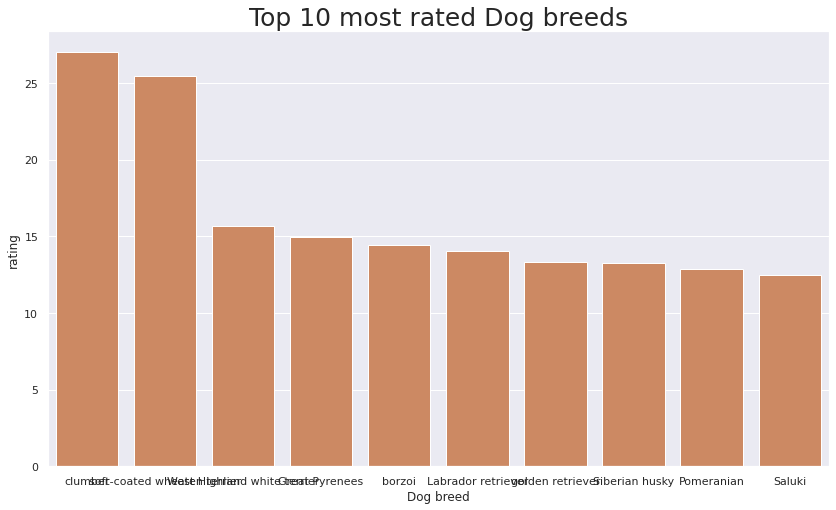

In [620]:
from matplotlib import rcParams

pl= sns.barplot(x = 'dog_breed',y = 'rating_numerator',data = top_dogs ,color = sns.color_palette()[1])
pl.set_title('Top 10 most rated Dog breeds',fontsize = 25)
pl.set_xlabel('Dog breed')
pl.set_ylabel('rating')
rcParams['figure.figsize'] = 8,14

plt.show()

#### Display top image of most rated dog:

In [609]:
master_dataframe[master_dataframe.dog_breed == 'clumber'].jpg_url

4100    https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg
4101    https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg
4102    https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg
4103    https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg
Name: jpg_url, dtype: object

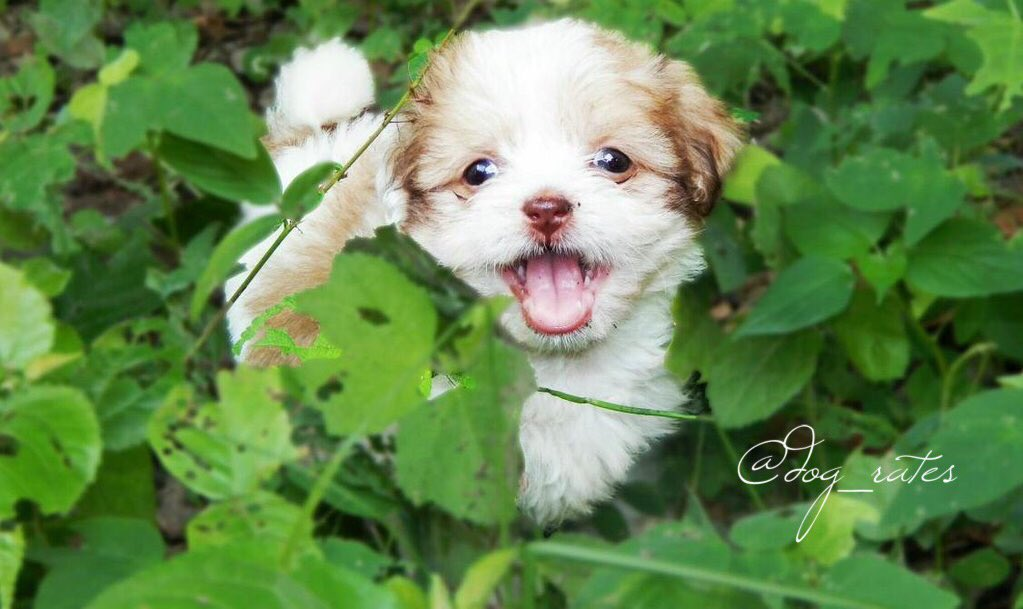

In [610]:
from IPython import display
display.Image('https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg')

#### Top 10 least Rated Dog Breeds

In [611]:
least_dogs =pd.DataFrame(master_dataframe.groupby('dog_breed')['rating_numerator'].mean()).sort_values(by = 'rating_numerator',
                                                                                         ascending = True).head(10)

In [612]:
least_dogs.reset_index(inplace = True)
least_dogs

,dog_breed,rating_numerator
0,Japanese spaniel,5.000000
1,miniature schnauzer,8.333333
2,Norwich terrier,9.000000
3,Scotch terrier,9.000000
4,Walker hound,9.000000
5,Welsh springer spaniel,9.000000
6,Ibizan hound,9.000000
7,Tibetan terrier,9.250000
8,Maltese dog,9.277778
9,dalmatian,9.333333


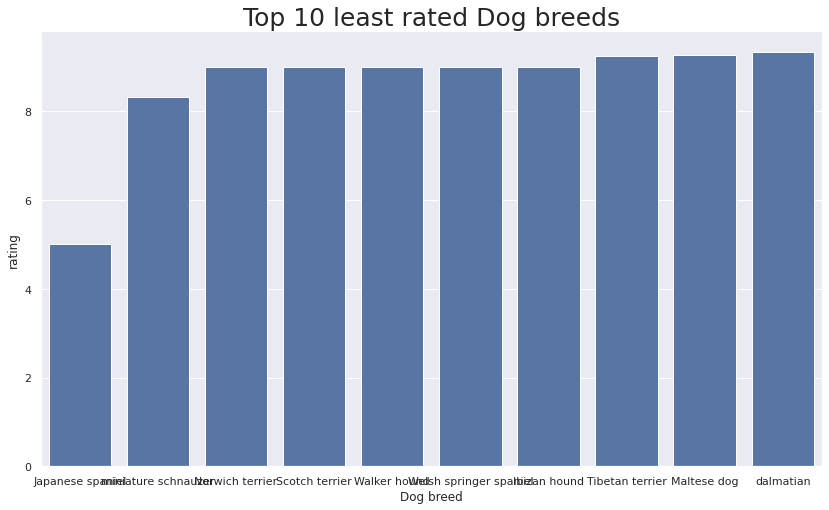

In [624]:
from matplotlib import rcParams

pl= sns.barplot(x = 'dog_breed',y = 'rating_numerator',data = least_dogs ,color = sns.color_palette()[0])
pl.set_title('Top 10 least rated Dog breeds',fontsize = 25)
pl.set_xlabel('Dog breed')
pl.set_ylabel('rating')
rcParams['figure.figsize'] = 8,14

plt.show()

#### Linear relationship between rating, retweet count and favorite count.

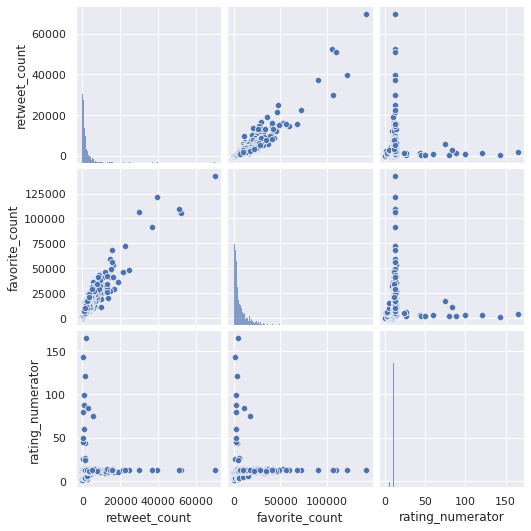

In [636]:
sns.pairplot(master_dataframe[['retweet_count','favorite_count', 'rating_numerator']])
sns.set(rc = {'figure.figsize':(20,20)})
plt.show()

-retweet_count and rating_numerator are not correlated.

-favorite_count and rating_numerator are not correlated.

-we can see a linear relationship between retweet_count and favorite_count, so they are posiively correlated.


##### correlation matrix between retweet count, favorite count and rating numerator

In [615]:
corr = master_dataframe[['retweet_count','favorite_count', 'rating_numerator']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,retweet_count,favorite_count,rating_numerator
retweet_count,1.00,0.93,0.05
favorite_count,0.93,1.00,0.06
rating_numerator,0.05,0.06,1.00


In [616]:
#calculating correlation using scipy 
r, p = scipy.stats.pearsonr(master_dataframe.retweet_count, master_dataframe.favorite_count)
r

0.9272400319224495

In [617]:
#p-value 
p 

0.0

In [618]:
#correlation matrix 
np.corrcoef(master_dataframe.retweet_count, master_dataframe.favorite_count)

array([[1.        , 0.92724003],
       [0.92724003, 1.        ]])